# EDA 

In [1]:
#Import Libraries

# common DS libraries
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import math

# helper libraries
import json
import datetime
import pickle

# CNN model
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.models import Sequential

# Model evaluation
from sklearn.metrics import mean_squared_error

# Read data

## Police Complaints

In [2]:
def append_to_df(df, path, xlsx=False, sep=','):
    df=pd.concat([
        df, 
        pd.read_excel(path, engine='openpyxl') if xlsx else pd.read_csv(path, sep=sep, encoding='latin-1')
    ])
    
    return df

def read_complaints():
    df_complaints=pd.read_csv('./Data/police_complaints/OpenDataContact_Gennaio_Giugno_2016.csv', sep=',')#[['Date', 'HomeTeam', 'AwayTeam']]
    df_complaints=append_to_df(df_complaints, './Data/police_complaints/OpenDataContact_Gennaio_Giugno_2016.csv')
    df_complaints=append_to_df(df_complaints, './Data/police_complaints/Contact_Gennaio_Giugno_2017.csv')
    df_complaints=append_to_df(df_complaints, './Data/police_complaints/OpenDataContact_Luglio_Dicembre_2017.csv')
    df_complaints=append_to_df(df_complaints, './Data/police_complaints/OpenDataContact_Luglio_Dicembre_2018.csv')
    df_complaints=append_to_df(df_complaints, './Data/police_complaints/OpenDataContact_Gennaio_Giugno_2018.xlsx', xlsx=True)
    df_complaints=append_to_df(df_complaints, './Data/police_complaints/OpenDataContact_Gennaio_Giugno_2019.csv')
    df_complaints=append_to_df(df_complaints, './Data/police_complaints/OpenDataContact_Luglio_Dicembre_2019.csv', sep=';')

    df_complaints["Data"]=pd.to_datetime(df_complaints['Data'], utc=True).astype('datetime64[ns]')
    df_complaints["Ora"]=pd.to_datetime(df_complaints['Ora'].astype(str), utc=True, format='%H.%M').values.astype('<M8[h]')
    return df_complaints.sort_values("Data", ascending=True) 

df_complaints=read_complaints()
df_complaints

,Categoria criminologa,Sottocategoria Criminologica,Circoscrizione,Localita,Area Verde,Data,Ora
382,Convivenza Civile,Disturbi Cani,2.0,BALTIMORA/(VIA) ...,NaN,2016-01-01,1900-01-01 18:00:00
796,Qualit� Urbana,Decoro e degrado urbano,3.0,COAZZE/(VIA) ...,NaN,2016-01-01,1900-01-01 17:00:00
382,Convivenza Civile,Disturbi Cani,2.0,BALTIMORA/(VIA) ...,NaN,2016-01-01,1900-01-01 18:00:00
796,Qualitï¿½ Urbana,Decoro e degrado urbano,3.0,COAZZE/(VIA) ...,NaN,2016-01-01,1900-01-01 17:00:00
49,Convivenza Civile,Aggregazioni giovanili,5.0,VAL DELLA TORRE/(VIA) ...,Area Verde,2016-01-02,NaT
...,...,...,...,...,...,...,...
189,Convivenza Civile,Altro,7.0,GIULIO CESARE/(CORSO) ...,NaN,2019-12-30,1900-01-01 09:00:00
374,Convivenza Civile,Disturbi da locali,8.0,SALUZZO/(LARGO) ...,NaN,2019-12-30,1900-01-01 12:00:00
832,Qualità Urbana,Decoro e degrado urbano,9.0,GALIMBERTI/TANCREDI (PIAZZA) ...,NaN,2019-12-30,1900-01-01 12:00:00
190,Convivenza Civile,Altro,8.0,MONCALIERI/(CORSO) ...,NaN,2019-12-31,1900-01-01 09:00:00


In [3]:
df_complaints=df_complaints[df_complaints["Sottocategoria Criminologica"]=="Rumori molesti"]
df_complaints

,Categoria criminologa,Sottocategoria Criminologica,Circoscrizione,Localita,Area Verde,Data,Ora
560,Convivenza Civile,Rumori molesti,1.0,MISERICORDIA/(VIA) ...,NaN,2016-01-03,NaT
560,Convivenza Civile,Rumori molesti,1.0,MISERICORDIA/(VIA) ...,NaN,2016-01-03,NaT
540,Convivenza Civile,Rumori molesti,9.0,NIZZA/(VIA) ...,NaN,2016-01-15,NaT
540,Convivenza Civile,Rumori molesti,9.0,NIZZA/(VIA) ...,NaN,2016-01-15,NaT
541,Convivenza Civile,Rumori molesti,7.0,CIGNA/FRANCESCO (LARGO) ...,NaN,2016-01-16,NaT
...,...,...,...,...,...,...,...
437,Convivenza Civile,Rumori molesti,7.0,REGGIO/(VIA) ...,NaN,2019-11-28,NaT
447,Convivenza Civile,Rumori molesti,4.0,BAGETTI/PIETRO (VIA) ...,NaN,2019-12-02,NaT
413,Convivenza Civile,Rumori molesti,8.0,S. ANSELMO/(VIA) ...,NaN,2019-12-09,1900-01-01 07:00:00
441,Convivenza Civile,Rumori molesti,3.0,COL DI LANA/(VIA) ...,NaN,2019-12-13,1900-01-01 12:00:00


### Aggregate complaints per day

In [4]:
df_complaints_day=df_complaints.groupby(pd.Grouper(key="Data", freq="D", origin='2016-01-01')).size().reset_index(name='counts').sort_values("Data")
df_complaints_day

,Data,counts
0,2016-01-03,2
1,2016-01-04,0
2,2016-01-05,0
3,2016-01-06,0
4,2016-01-07,0
...,...,...
1436,2019-12-09,1
1437,2019-12-10,0
1438,2019-12-11,0
1439,2019-12-12,0


### Aggregate complaints per hour

In [5]:
df_complaints_hour=df_complaints.groupby(pd.Grouper(key="Ora", freq="H")).size().reset_index(name='counts').sort_values("Ora")
df_complaints_hour

,Ora,counts
0,1900-01-01 07:00:00,5
1,1900-01-01 08:00:00,7
2,1900-01-01 09:00:00,15
3,1900-01-01 10:00:00,19
4,1900-01-01 11:00:00,19
5,1900-01-01 12:00:00,14
6,1900-01-01 13:00:00,8
7,1900-01-01 14:00:00,7
8,1900-01-01 15:00:00,2


### Aggregate complaints and noise levels per hour

In [6]:
df_complaints_hour

,Ora,counts
0,1900-01-01 07:00:00,5
1,1900-01-01 08:00:00,7
2,1900-01-01 09:00:00,15
3,1900-01-01 10:00:00,19
4,1900-01-01 11:00:00,19
5,1900-01-01 12:00:00,14
6,1900-01-01 13:00:00,8
7,1900-01-01 14:00:00,7
8,1900-01-01 15:00:00,2


## Weather from IoT sensors

In [7]:
def obj_col_to_float(df, col):
    df[col] = df[col].astype(str).str.replace(',', '.')
    df[col]=df[col].astype(float)
    
    return df

In [8]:
# C1 = TORINO GIARDINI REALI, Rain level about 10 minutes - Millimeters;;;
df_rain = pd.read_csv('./Data/weather/weather_rain.csv', sep=';')[['Date', 'Hour', 'C1']].rename(columns={'C1':'rain_mm'})
# C1 = TORINO GIARDINI REALI, Wind speed (scalar) - Meters per second;;
df_wind_speed = pd.read_csv('./Data/weather/weather_wind_speed.csv', sep=';')[['Date', 'Hour', 'C1']].rename(columns={'C1':'wind_speed_ms'})
# C1 = TORINO GIARDINI REALI, Wind speed (gust) - Meters per second;;
df_wind_gust = pd.read_csv('./Data/weather/weather_wind_gust.csv', sep=';')[['Date', 'Hour', 'C1']].rename(columns={'C1':'wind_gust_ms'})
# C1 = TORINO GIARDINI REALI, Snow depth - Meters;;;
# C2 = TORINO GIARDINI REALI, Air temperature - Degrees Celsius;;;
df_snow_temperature = pd.read_csv('./Data/weather/weather_snow_temperature.csv', sep=';')[['Date', 'Hour', 'C1', 'C2']].rename(columns={'C1':'snow_m', 'C2': 'temperature_c'})


df_weather=pd.merge(df_rain, df_wind_speed, left_on=["Date", "Hour"], right_on=["Date", "Hour"], how='outer')
df_weather=pd.merge(df_weather, df_wind_gust, left_on=["Date", "Hour"], right_on=["Date", "Hour"], how='outer')
df_weather=pd.merge(df_weather, df_snow_temperature, left_on=["Date", "Hour"], right_on=["Date", "Hour"], how='outer')

df_weather["Date"]=pd.to_datetime(df_weather['Date'], utc=True).astype('datetime64[ns]')
df_weather=obj_col_to_float(df_weather, "rain_mm")
df_weather=obj_col_to_float(df_weather, "wind_speed_ms")
df_weather=obj_col_to_float(df_weather, "wind_gust_ms")
df_weather=obj_col_to_float(df_weather, "snow_m")
df_weather=obj_col_to_float(df_weather, "temperature_c")

df_weather

/home/fabio/miniconda3/envs/WDL/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Date,Hour,rain_mm,wind_speed_ms,wind_gust_ms,snow_m,temperature_c
0,2016-01-06,00:00,NaN,NaN,NaN,NaN,NaN
1,2016-01-06,00:10,0.0,0.6,NaN,NaN,NaN
2,2016-01-06,00:20,0.0,0.7,NaN,NaN,NaN
3,2016-01-06,00:30,0.0,0.8,NaN,-0.02,14.2
4,2016-01-06,00:40,0.0,0.8,NaN,NaN,NaN
...,...,...,...,...,...,...,...
266107,2021-06-22,23:10,0.0,NaN,NaN,NaN,NaN
266108,2021-06-22,23:20,0.0,NaN,NaN,NaN,NaN
266109,2021-06-22,23:30,0.0,NaN,NaN,0.35,16.9
266110,2021-06-22,23:40,0.4,NaN,NaN,NaN,NaN


### Generate aggregated values per day

In [9]:
df_weather_day=df_weather.groupby("Date", dropna=True).agg({
    'rain_mm': 'mean', 
    'wind_speed_ms': 'mean',
    'wind_gust_ms': 'mean',
    'snow_m': 'mean',
    'temperature_c': 'mean'
}) 

df_weather_day

,rain_mm,wind_speed_ms,wind_gust_ms,snow_m,temperature_c
Date,,,,,
2016-01-06,0.000000,0.731469,2.126087,0.017872,17.736170
2016-01-07,0.000000,0.260839,1.404348,0.031489,24.648936
2016-01-08,0.001399,0.470629,2.226087,-0.005106,24.785106
2016-01-09,0.000000,0.481119,1.565217,-0.006809,24.536170
2016-01-10,0.000000,0.467133,1.652174,0.025532,16.946809
...,...,...,...,...,...
2021-12-02,0.000000,NaN,NaN,-0.000213,3.472340
2021-12-03,0.000000,NaN,NaN,-0.026596,10.127660
2021-12-04,0.012587,NaN,NaN,0.018936,10.714894


### Generate aggregated values per hour

In [10]:
df_weather_hour=df_weather

df_weather_hour["Hour"]=pd.to_datetime(df_weather['Hour'].astype(str), utc=True, format='%H:%M').values.astype('<M8[h]')

df_weather_hour=df_weather.groupby("Hour", dropna=True).agg({
    'rain_mm': 'mean', 
    'wind_speed_ms': 'mean',
    'wind_gust_ms': 'mean',
    'snow_m': 'mean',
    'temperature_c': 'mean'
}) 

df_weather_hour

,rain_mm,wind_speed_ms,wind_gust_ms,snow_m,temperature_c
Hour,,,,,
1900-01-01 00:00:00,0.015665,0.287866,NaN,0.045073,11.895652
1900-01-01 01:00:00,0.012034,0.283394,1.226715,0.043985,11.592841
1900-01-01 02:00:00,0.014851,0.266577,1.238378,0.046364,11.239292
1900-01-01 03:00:00,0.012147,0.267327,1.200901,0.048031,10.902588
1900-01-01 04:00:00,0.013539,0.263483,1.233514,0.049485,10.610879
1900-01-01 05:00:00,0.015122,0.266547,1.190270,0.047208,10.369894
1900-01-01 06:00:00,0.014531,0.271502,1.203243,0.053011,10.192988
1900-01-01 07:00:00,0.013272,0.345526,1.221982,0.056872,10.416388
1900-01-01 08:00:00,0.015408,0.480601,1.444505,0.054700,11.732749


## Holidays

In [11]:
df_holidays=None 

for year in range (2016, 2022): 
    with open('./Data/holidays/{}.json'.format(year)) as f:
       data = json.load(f)

    curr = pd.json_normalize(data, ["response", 'holidays'])
    if df_holidays is None:
        df_holidays = curr
    else:
        df_holidays=pd.concat([df_holidays, curr])
  
df_holidays['date.iso'] = pd.to_datetime(df_holidays['date.iso'], utc=True).astype('datetime64[ns]')
print(df_holidays.shape)

df_holidays=df_holidays[["name", "description", "type", "date.iso", "locations", "states"]]
df_holidays.head()
#df_holidays[df_holidays['date.iso'] > datetime.datetime(year=2017,month=1,day=1)]

(144, 19)


,name,description,type,date.iso,locations,states
0,New Year's Day,New Year’s Day is celebrated in Italy on Janua...,[National holiday],2016-01-01 00:00:00,All,All
1,Epiphany,Epiphany is a national holiday in Italy celebr...,[National holiday],2016-01-06 00:00:00,All,All
2,March Equinox,March Equinox in Italy (Rome),[Season],2016-03-20 04:30:04,All,All
3,Good Friday,Good Friday is part of the Holy Week of Easter...,[Observance],2016-03-25 00:00:00,All,All
4,Easter Sunday,Easter Day is a public holiday that is celebra...,[Observance],2016-03-27 00:00:00,All,All


## Football games

In [12]:
df_football=None 

for year in range (2015, 2021): 
    curr = pd.read_csv('./Data/football/series_a/{}.csv'.format(year), sep=',')[['Date', 'HomeTeam', 'AwayTeam']]
    if df_football is None:
        df_football = curr
    else:
        df_football=pd.concat([df_football, curr])

df_football["Date"]=pd.to_datetime(df_football['Date'], utc=True).astype('datetime64[ns]')

# Filter by games related at fc torino
df_football=df_football[df_football['HomeTeam']=='Torino']
df_football

,Date,HomeTeam,AwayTeam
18,2015-08-30,Torino,Fiorentina
39,2015-09-20,Torino,Sampdoria
56,2015-09-27,Torino,Palermo
71,2015-10-17,Torino,Milan
97,2015-10-28,Torino,Genoa
...,...,...,...
307,2021-04-18,Torino,Roma
327,2021-04-26,Torino,Napoli
338,2021-03-05,Torino,Parma
357,2021-12-05,Torino,Milan


# Correlation Analysis

## Anomaly correlations

In [14]:
base = './Data/noise_data/csv_format'

In [15]:
def saving_dfs_as_binary_files(base):
    
    df = pd.read_csv(base+'/'+"san_salvario_" + str(2016) + ".csv", sep=";")
    
    for year in range(2017, 2020):
        df_year = pd.read_csv(base+'/'+"san_salvario_" + str(year) + ".csv", sep=";")
        df = pd.concat([df, df_year])
    
    pickle.dump(df, open(base+'/'+"df_raw", "wb"))
        
saving_dfs_as_binary_files(base)

In [16]:
sensors=["C1", "C2", "C3", "C4", "C5"]
# Opening data
def get_sensors_data(sensors):
    df = pickle.load(open(base+'/'+"df_raw", "rb" ))

    for col in sensors:
        df[col] = df[col].str.replace(',', '.').astype(float)

    df['date'] = pd.to_datetime(df["Data"] + df['Ora'] , format='%d-%m-%Y%H:00')
    df['year'] = df["date"].dt.year
    df['month'] = df["date"].dt.month
    df['day'] = df["date"].dt.day
    df['hour'] = df['Ora'].str.replace(':00', '').astype(int)
    
    df = df.set_index('date')
    
    df['C1_temp'] = pow(10, df['C1']/10)
    df['C2_temp'] = pow(10, df['C2']/10)
    df['C3_temp'] = pow(10, df['C3']/10)
    df['C4_temp'] = pow(10, df['C4']/10)
    df['C5_temp'] = pow(10, df['C5']/10)
    
    # e se tiver valores nulos??
    df['C_avg'] = df[['C1_temp', 'C2_temp', 'C3_temp', 'C4_temp', 'C5_temp']].sum(axis = 1).div(5)
    df['C_avg'] = 10*np.log10(df['C_avg'])
    
    #return df
    return df[['year', 'month', 'day', 'hour', 'C1', 'C2', 'C3', 'C4', 'C5', 'C_avg']]
    
df = get_sensors_data(sensors)
df

/home/fabio/miniconda3/envs/WDL/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,year,month,day,hour,C1,C2,C3,C4,C5,C_avg
date,,,,,,,,,,
2016-06-01 00:00:00,2016,6,1,0,61.1,58.8,63.7,60.4,60.2,61.162532
2016-06-01 01:00:00,2016,6,1,1,57.2,56.1,60.4,57.7,58.4,58.207715
2016-06-01 02:00:00,2016,6,1,2,52.5,53.4,52.9,56.7,56.5,54.788571
2016-06-01 03:00:00,2016,6,1,3,50.6,46.6,45.7,47.9,55.6,50.951102
2016-06-01 04:00:00,2016,6,1,4,47.4,46.2,45.1,45.8,56.8,51.110268
...,...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00,2019,12,31,19,62.2,59.8,60.3,NaN,NaN,58.675970
2019-12-31 20:00:00,2019,12,31,20,59.4,59.7,55.9,NaN,NaN,56.421207
2019-12-31 21:00:00,2019,12,31,21,59.2,61.0,56.0,NaN,NaN,56.970194


In [17]:
def outlier_detection_using_z_score(df, t=2):
    # t - threshold - number of standard deviation
    mean = np.mean(df.iloc[:, 0])
    std = np.std(df.iloc[:, 0])
    
    # não fazemos abs((i-mean)/std) porque só nos interessa os que estão acima da média
    df['z_score'] = [(i-mean)/std for i in df.iloc[:, 0]]
    df['is_outlier'] = [True if x>t else False for x in df.z_score.values ]
    
    df['out'] = df['C1'] * df['is_outlier']
    df['out'] = [None if x==0 else x for x in df.out.values]

    df = df.reset_index()
    
    return df
    
    
df_out = outlier_detection_using_z_score(df[['C1']], t=1)
df_out

<ipython-input-17-48c0fba26c1c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['z_score'] = [(i-mean)/std for i in df.iloc[:, 0]]
<ipython-input-17-48c0fba26c1c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_outlier'] = [True if x>t else False for x in df.z_score.values ]
<ipython-input-17-48c0fba26c1c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

,date,C1,z_score,is_outlier,out
0,2016-06-01 00:00:00,61.1,0.291701,False,NaN
1,2016-06-01 01:00:00,57.2,-0.401050,False,NaN
2,2016-06-01 02:00:00,52.5,-1.235904,False,NaN
3,2016-06-01 03:00:00,50.6,-1.573398,False,NaN
4,2016-06-01 04:00:00,47.4,-2.141809,False,NaN
...,...,...,...,...,...
31411,2019-12-31 19:00:00,62.2,0.487092,False,NaN
31412,2019-12-31 20:00:00,59.4,-0.010268,False,NaN
31413,2019-12-31 21:00:00,59.2,-0.045793,False,NaN
31414,2019-12-31 22:00:00,57.0,-0.436576,False,NaN


In [18]:
df_out_max_per_day=df_out.groupby(pd.Grouper(key="date", freq = 'D')).agg({'C1': 'max'})

df_out_max_per_day

,C1
date,
2016-06-01,69.1
2016-06-02,70.8
2016-06-03,68.4
2016-06-04,71.4
2016-06-05,69.9
...,...
2019-12-27,65.1
2019-12-28,69.4
2019-12-29,67.4


In [19]:
df_outlier_day = (df_out.set_index('date')
               .groupby([pd.Grouper(freq = 'D'),'is_outlier'])
               .size()
               .unstack(fill_value=0))

df_outlier_day

is_outlier,False,True
date,,
2016-06-01,21,3
2016-06-02,21,3
2016-06-03,20,4
2016-06-04,16,8
2016-06-05,19,5
...,...,...
2019-12-27,23,1
2019-12-28,22,2
2019-12-29,21,3


In [20]:
df_max_peaks_day=pd.merge(df_out_max_per_day, df_outlier_day, left_on="date", right_on="date")[[True, "C1"]].rename(columns={True: "noise_peaks", 'C1':'max_day_peak'})

df_max_peaks_day

,noise_peaks,max_day_peak
date,,
2016-06-01,3,69.1
2016-06-02,3,70.8
2016-06-03,4,68.4
2016-06-04,8,71.4
2016-06-05,5,69.9
...,...,...
2019-12-27,1,65.1
2019-12-28,2,69.4
2019-12-29,3,67.4


In [21]:
# Merge dfs
df_merged=pd.merge(df_complaints_day, df_max_peaks_day, left_on=["Data"], right_on=["date"], how='inner')

df_comp_peaks_day=df_merged[['Data', 'counts', "noise_peaks", "max_day_peak"]].rename(columns={'counts':'complaints'})

df_comp_peaks_day

,Data,complaints,noise_peaks,max_day_peak
0,2016-06-01,0,3,69.1
1,2016-06-02,0,3,70.8
2,2016-06-03,0,4,68.4
3,2016-06-04,4,8,71.4
4,2016-06-05,0,5,69.9
...,...,...,...,...
1286,2019-12-09,1,1,65.2
1287,2019-12-10,0,0,64.7
1288,2019-12-11,0,1,70.7
1289,2019-12-12,0,2,66.0


## Relation between noise peaks (anomalies) and noise complaints per day

<AxesSubplot:>

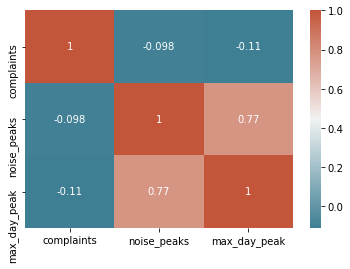

In [22]:
# calculate correlation matrix
corr = df_comp_peaks_day.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [23]:
df_peaks_comps=df_comp_peaks_day.groupby("noise_peaks").agg({
    'complaints': 'mean'
}) 

df_peaks_comps

,complaints
noise_peaks,
0,0.496970
1,0.442509
2,0.460733
3,0.330709
4,0.268908
5,0.281553
6,0.364865
7,0.162162
8,0.437500


<AxesSubplot:title={'center':'Noise peaks vs complaints per day'}, xlabel='Number of noise peaks', ylabel='Number of complaints'>

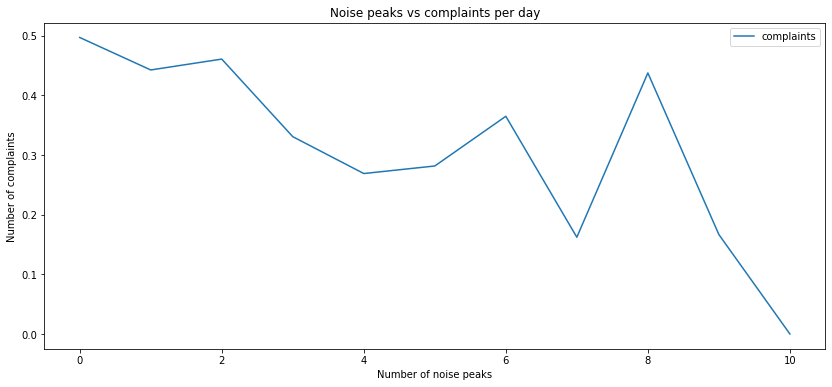

In [24]:
df_peaks_comps.plot(figsize=(14,6), ylabel="Number of complaints", xlabel="Number of noise peaks", title="Noise peaks vs complaints per day")

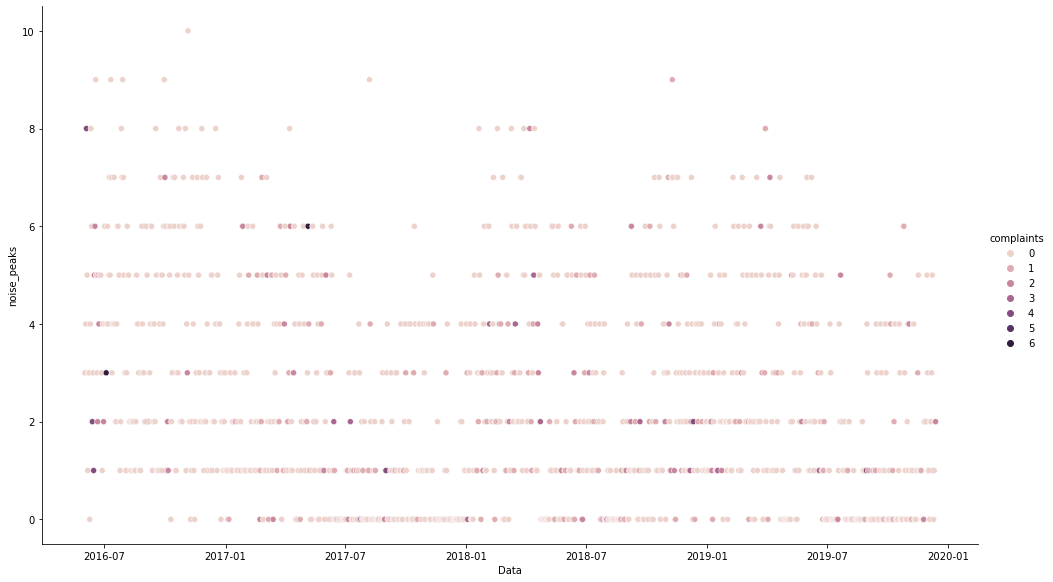

In [27]:
sns.relplot(x="Data", y="noise_peaks", hue="complaints", data=df_comp_peaks_day,  height=8, aspect=1.7)

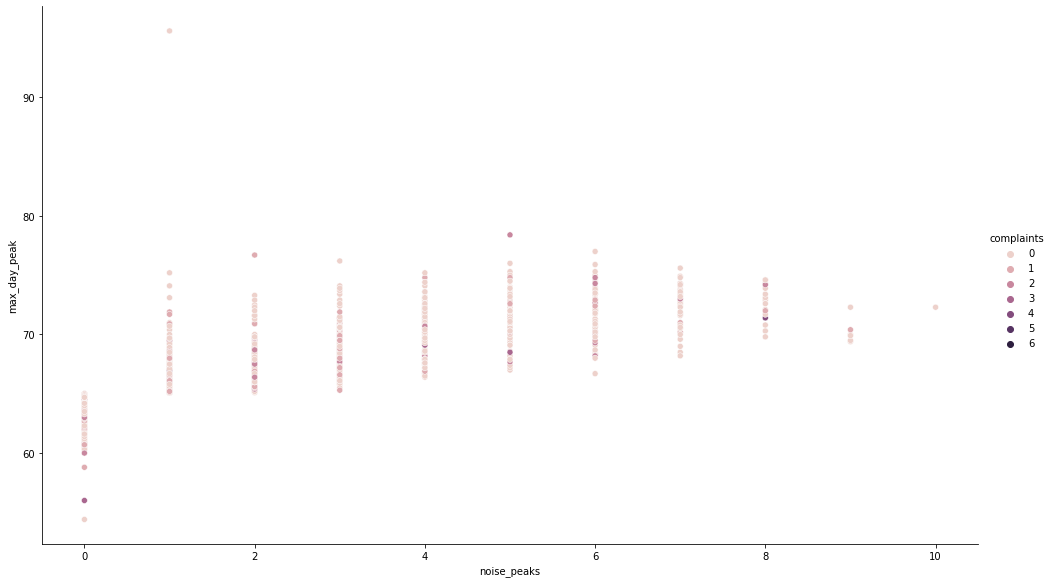

In [28]:
sns.relplot(x="noise_peaks", y="max_day_peak",  hue="complaints", data=df_comp_peaks_day,  height=8, aspect=1.7)

When we don't have any peaks, the maximum day peak is logically small. When we have peaks then we have a maximum day noise peak that is larger.  


However, having larger day noise peaks doesn't necessaraly mean more complaints, neither does having more noise peaks in a day.

## Weather

In [29]:
# Merge dfs
df_merged=pd.merge(df_comp_peaks_day, df_weather_day, left_on=["Data"], right_on=["Date"], how='outer')
df_merged=df_merged[df_merged["Data"].notnull()]

df_merged

,Data,complaints,noise_peaks,max_day_peak,rain_mm,wind_speed_ms,wind_gust_ms,snow_m,temperature_c
0,2016-06-01,0.0,3.0,69.1,NaN,NaN,NaN,NaN,NaN
1,2016-06-02,0.0,3.0,70.8,NaN,NaN,NaN,NaN,NaN
2,2016-06-03,0.0,4.0,68.4,NaN,NaN,NaN,NaN,NaN
3,2016-06-04,4.0,8.0,71.4,NaN,NaN,NaN,NaN,NaN
4,2016-06-05,0.0,5.0,69.9,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1286,2019-12-09,1.0,1.0,65.2,0.000000,NaN,NaN,0.087021,20.344681
1287,2019-12-10,0.0,0.0,64.7,0.000000,NaN,NaN,0.022222,13.648936
1288,2019-12-11,0.0,1.0,70.7,0.001399,NaN,NaN,0.010000,7.517021
1289,2019-12-12,0.0,2.0,66.0,0.000000,NaN,NaN,-0.007447,2.393617


### Overall correlation

<AxesSubplot:>

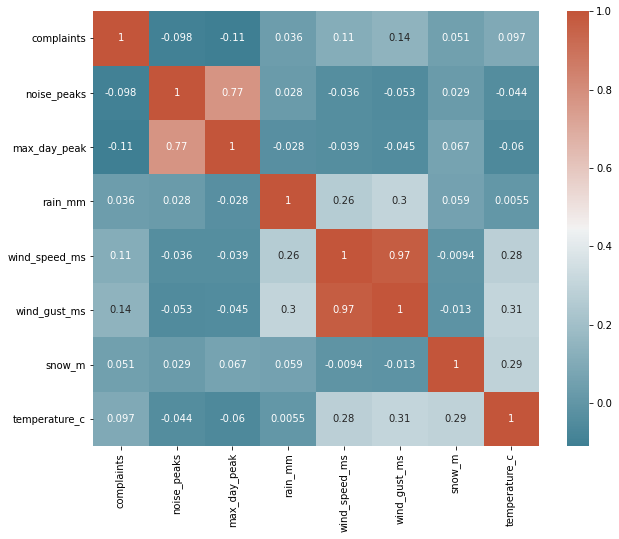

In [30]:
# calculate correlation matrix
corr = df_merged.corr()# plot the heatmap
plt.figure(figsize = (10,8))

sns.heatmap(
    corr, 
    xticklabels=corr.columns, 
    yticklabels=corr.columns, 
    annot=True, 
    cmap=sns.diverging_palette(220, 20, as_cmap=True)
)

### Wind vs Noise Complaints vs Noise Peaks

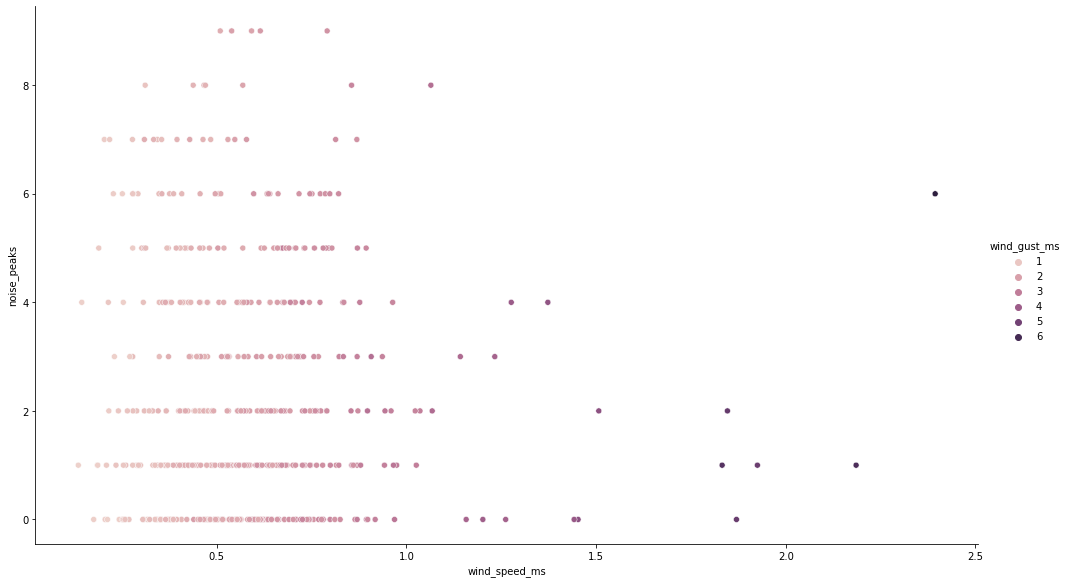

In [31]:
sns.relplot(x="wind_speed_ms", y="noise_peaks", hue="wind_gust_ms", data=df_merged, height=8, aspect=1.7);

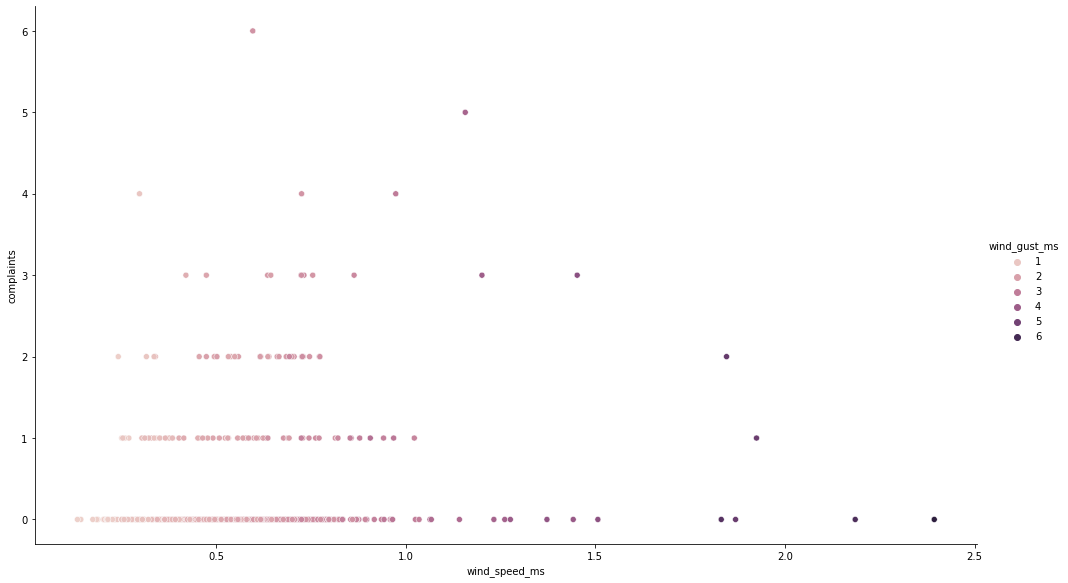

In [32]:
sns.relplot(x="wind_speed_ms", y="complaints", hue="wind_gust_ms", data=df_merged, height=8, aspect=1.7);

We can verify that whenever we have a larger wind speed then we have less noise peaks. Therefore, this can lead to the conclusion that when there is a larger wind speed then we will have less people around each other in the roads/restaurents/etc. and ultemately less noise.

### Temperature/Snow vs Noise Complaints vs Noise Peaks

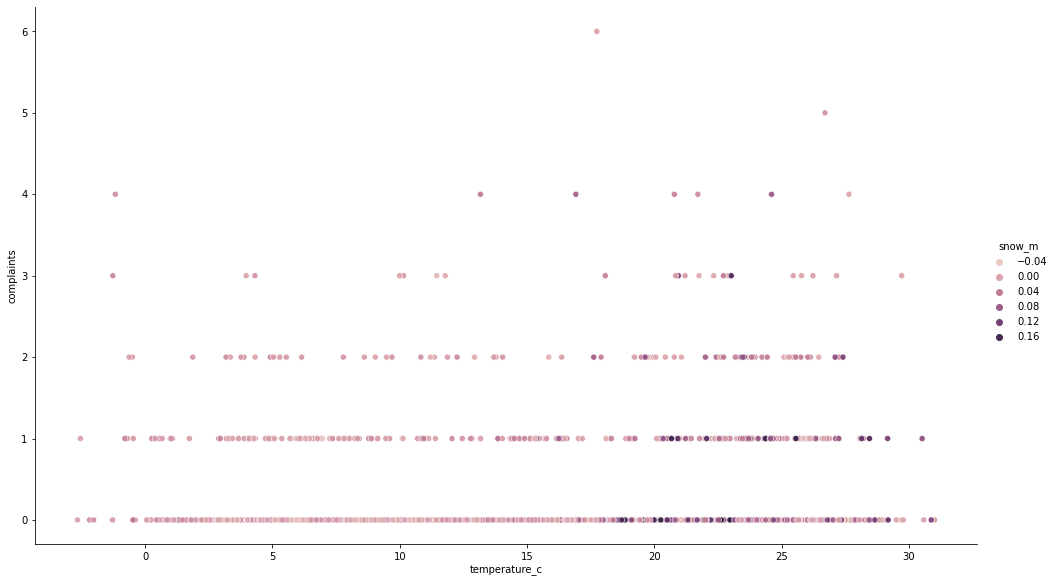

In [33]:
sns.relplot(x="temperature_c", y="complaints", hue="snow_m", data=df_merged, height=8, aspect=1.7);

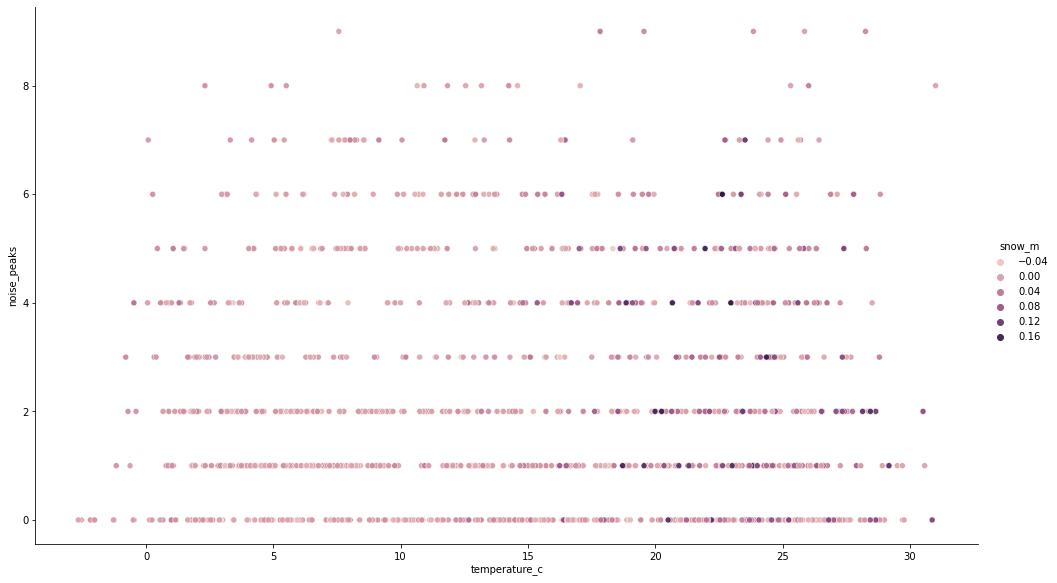

In [34]:
sns.relplot(x="temperature_c", y="noise_peaks", hue="snow_m", data=df_merged, height=8, aspect=1.7);

### Rain vs Noise Complaints vs Noise Peaks

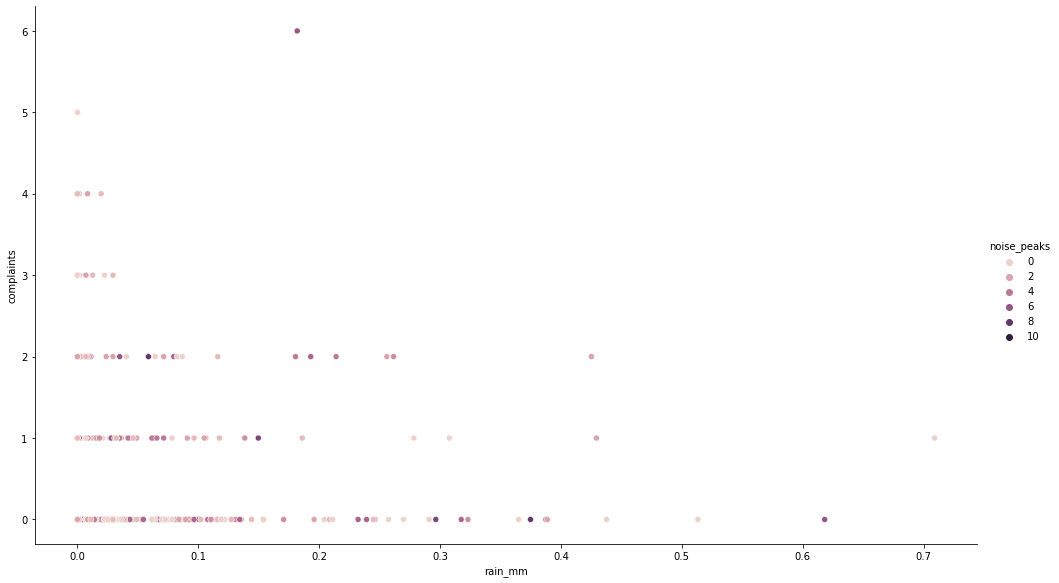

In [35]:
sns.relplot(x="rain_mm", y="complaints", hue="noise_peaks", data=df_merged, height=8, aspect=1.7);

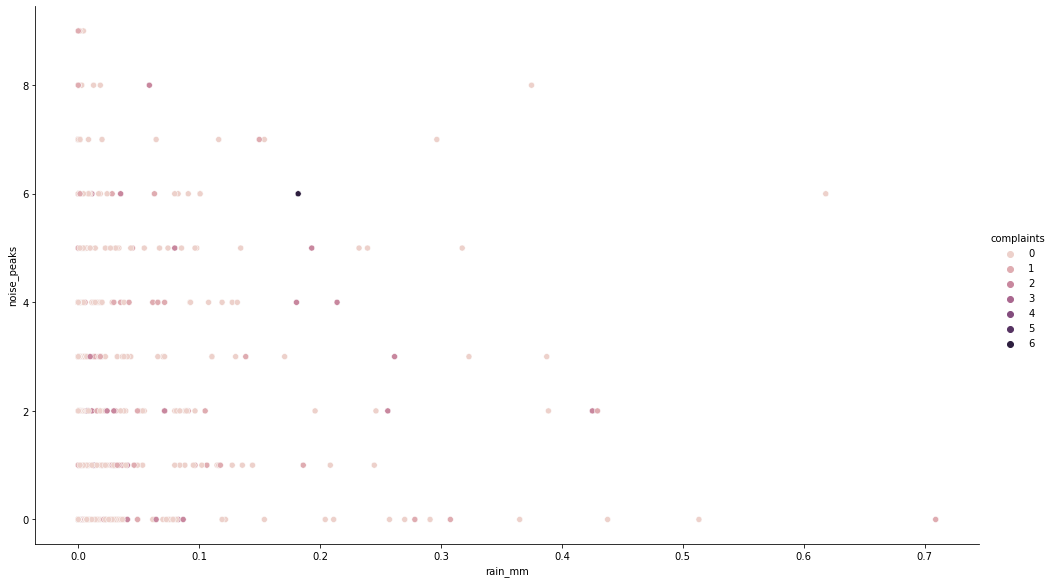

In [36]:
sns.relplot(x="rain_mm", y="noise_peaks", hue="complaints", data=df_merged, height=8, aspect=1.7);

### Rain vs wind speed vs noise peaks

<AxesSubplot:>

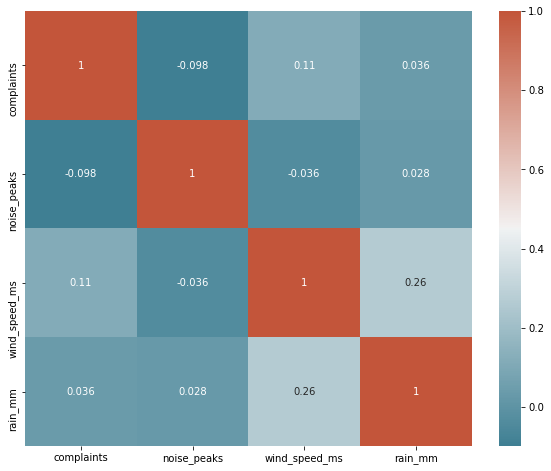

In [37]:
#sns.relplot(x="rain_mm", y="wind_speed_ms", hue="noise_peaks", data=df_merged);


# calculate correlation matrix
corr = df_merged[["complaints", "noise_peaks", "wind_speed_ms", "rain_mm"]].corr()# plot the heatmap
plt.figure(figsize = (10,8))

sns.heatmap(
    corr, 
    xticklabels=corr.columns, 
    yticklabels=corr.columns, 
    annot=True, 
    cmap=sns.diverging_palette(220, 20, as_cmap=True)
)

We can verify that whenever we have more rain then we have less noise peaks. Therefore, this can lead to the conclusion that when there is more rain then we will have less people around each other in the roads/restaurents/etc. and ultemately less noise.

### Analysis per hour

In [38]:
# Merge dfs
df_merged=pd.merge(df_complaints_hour, df_weather_hour, left_on=["Ora"], right_on=["Hour"], how='outer')
df_merged=df_merged[df_merged["counts"].notnull()]

df_merged

,Ora,counts,rain_mm,wind_speed_ms,wind_gust_ms,snow_m,temperature_c
0,1900-01-01 07:00:00,5.0,0.013272,0.345526,1.221982,0.056872,10.416388
1,1900-01-01 08:00:00,7.0,0.015408,0.480601,1.444505,0.054700,11.732749
2,1900-01-01 09:00:00,15.0,0.012992,0.664602,1.726126,0.048637,13.479265
3,1900-01-01 10:00:00,19.0,0.011868,0.823095,2.100361,0.044356,15.011055
4,1900-01-01 11:00:00,19.0,0.010932,0.945137,2.350090,0.039813,16.452407
5,1900-01-01 12:00:00,14.0,0.010914,1.030093,2.622604,0.036271,17.720373
6,1900-01-01 13:00:00,8.0,0.010895,1.073977,2.809928,0.035419,18.631469
7,1900-01-01 14:00:00,7.0,0.011396,1.079031,2.936462,0.033621,19.242778
8,1900-01-01 15:00:00,2.0,0.026420,1.012846,2.949278,0.035018,19.305290


<AxesSubplot:>

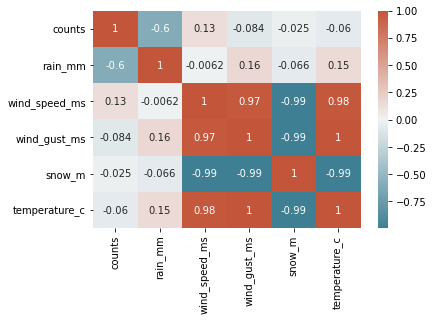

In [39]:
# calculate correlation matrix
corr = df_merged.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

### Weekends vs noise peaks

In [40]:
# Assign bool var
df_comp_peaks_day['IsWeekend'] = df_comp_peaks_day.apply(lambda row: True if row.Data.weekday() > 4 else False, axis=1)

# project values
df_weekend=df_comp_peaks_day[["Data", "complaints", "noise_peaks", "IsWeekend"]]
df_weekend

,Data,complaints,noise_peaks,IsWeekend
0,2016-06-01,0,3,False
1,2016-06-02,0,3,False
2,2016-06-03,0,4,False
3,2016-06-04,4,8,True
4,2016-06-05,0,5,True
...,...,...,...,...
1286,2019-12-09,1,1,False
1287,2019-12-10,0,0,False
1288,2019-12-11,0,1,False
1289,2019-12-12,0,2,False


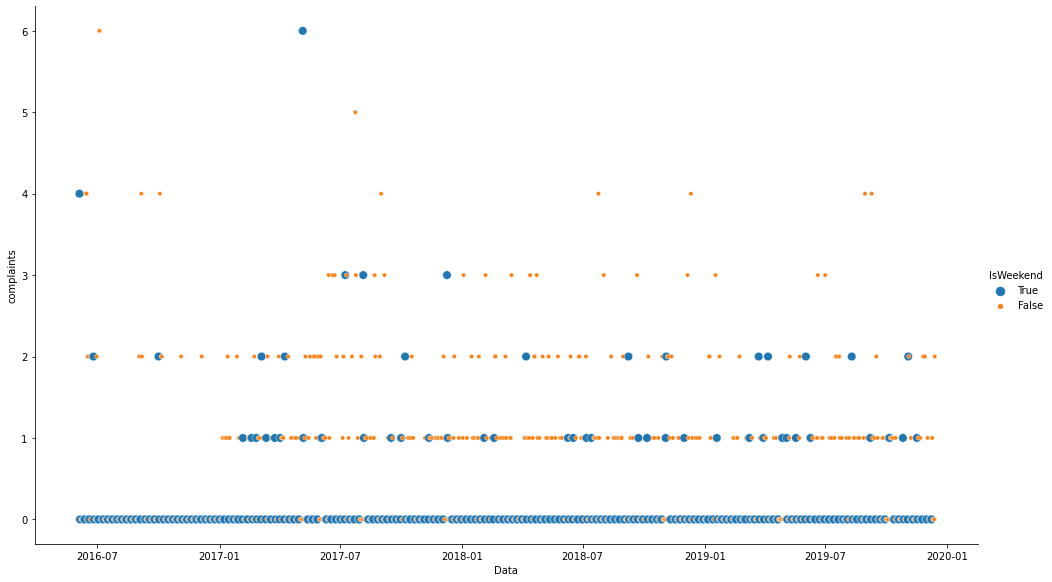

In [41]:
sns.relplot(x="Data", y="complaints", hue="IsWeekend", hue_order=[True, False], size_order=[True, False], size="IsWeekend", data=df_weekend, height=8, aspect=1.7);

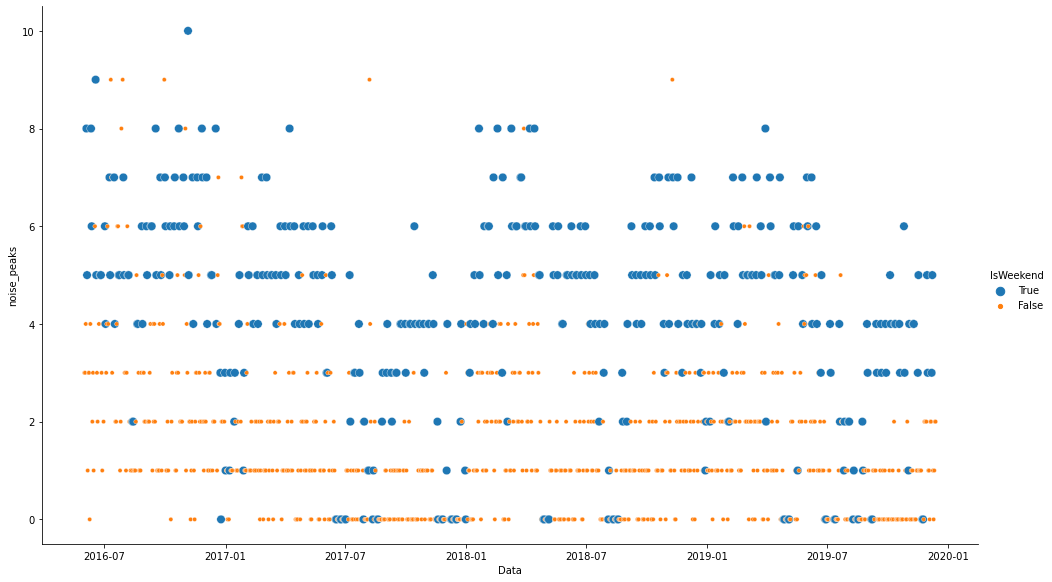

In [42]:
sns.relplot(x="Data", y="noise_peaks", hue="IsWeekend", hue_order=[True, False], size_order=[True, False], size="IsWeekend", data=df_weekend, height=8, aspect=1.7);

### Holidays vs noise peaks

In [43]:
# Merge dfs
df_merged=pd.merge(df_comp_peaks_day, df_holidays, left_on=["Data"], right_on=["date.iso"], how='outer')
df_merged=df_merged[df_merged["Data"].notnull()]

# Assign bool var
df_merged['IsHoliday'] = df_merged.apply(lambda row: False if pd.isnull(row['type'])  else True, axis=1)

# project values
df_metrics_holidays_day=df_merged[["Data", "complaints", "noise_peaks", "IsHoliday"]]
df_metrics_holidays_day

,Data,complaints,noise_peaks,IsHoliday
0,2016-06-01,0.0,3.0,False
1,2016-06-02,0.0,3.0,True
2,2016-06-03,0.0,4.0,False
3,2016-06-04,4.0,8.0,False
4,2016-06-05,0.0,5.0,False
...,...,...,...,...
1293,2019-12-09,1.0,1.0,False
1294,2019-12-10,0.0,0.0,False
1295,2019-12-11,0.0,1.0,False
1296,2019-12-12,0.0,2.0,False


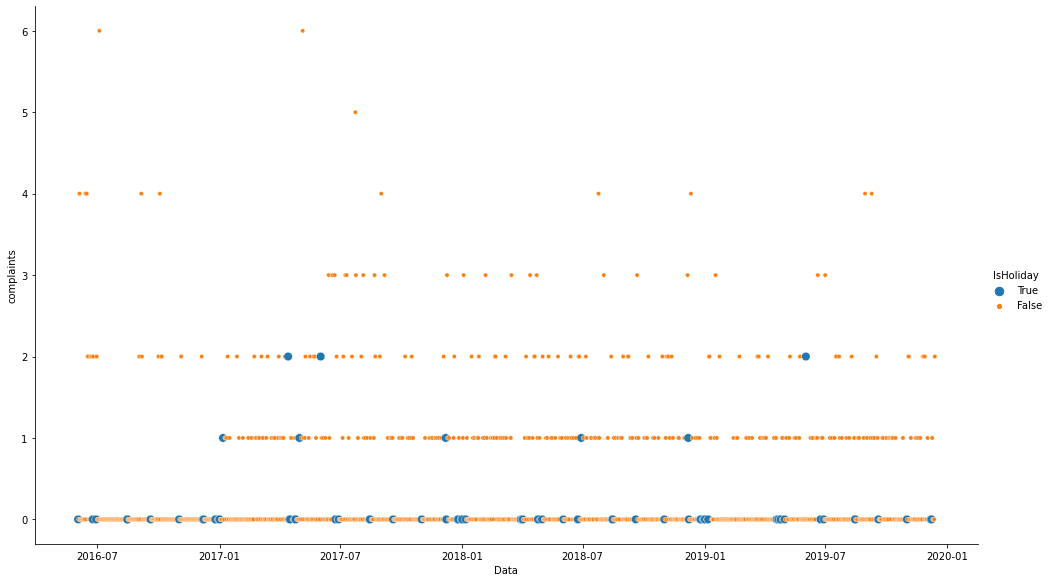

In [44]:
sns.relplot(x="Data", y="complaints", hue="IsHoliday", hue_order=[True, False], size_order=[True, False], size="IsHoliday", data=df_metrics_holidays_day, height=8, aspect=1.7);

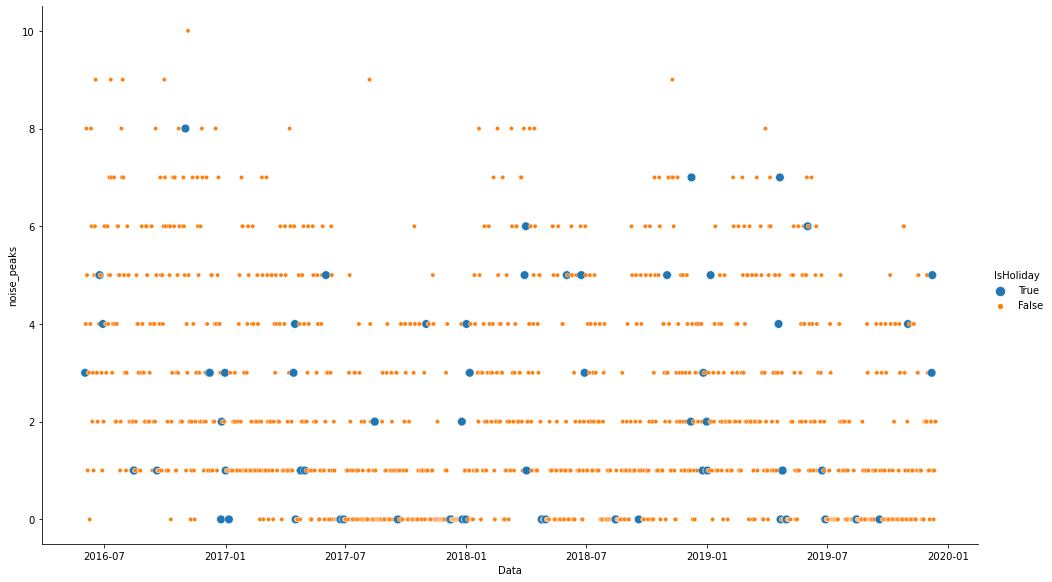

In [45]:
sns.relplot(x="Data", y="noise_peaks", hue="IsHoliday", hue_order=[True, False], size_order=[True, False], size="IsHoliday", data=df_metrics_holidays_day, height=8, aspect=1.7);

### Football vs noise peaks

In [46]:
# Merge dfs
df_merged=pd.merge(df_comp_peaks_day, df_football, left_on=["Data"], right_on=["Date"], how='outer')
df_merged=df_merged[df_merged["Data"].notnull()]

# Assign bool var
df_merged['IsFootball'] = df_merged.apply(lambda row: False if pd.isnull(row['HomeTeam'])  else True, axis=1)

# project values
df_metrics_football_day=df_merged[["Data", "complaints", "noise_peaks", "IsFootball"]]
df_metrics_football_day

,Data,complaints,noise_peaks,IsFootball
0,2016-06-01,0.0,3.0,False
1,2016-06-02,0.0,3.0,False
2,2016-06-03,0.0,4.0,True
3,2016-06-04,4.0,8.0,False
4,2016-06-05,0.0,5.0,False
...,...,...,...,...
1286,2019-12-09,1.0,1.0,False
1287,2019-12-10,0.0,0.0,False
1288,2019-12-11,0.0,1.0,False
1289,2019-12-12,0.0,2.0,False


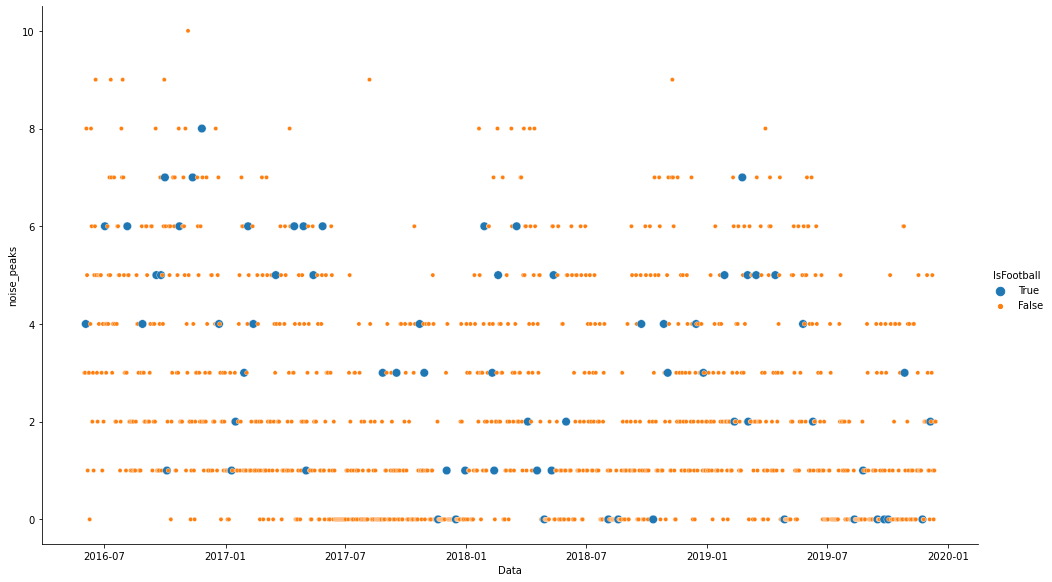

In [47]:
sns.relplot(x="Data", y="noise_peaks", hue="IsFootball", hue_order=[True, False], size_order=[True, False], size="IsFootball", data=df_metrics_football_day, height=8, aspect=1.7);

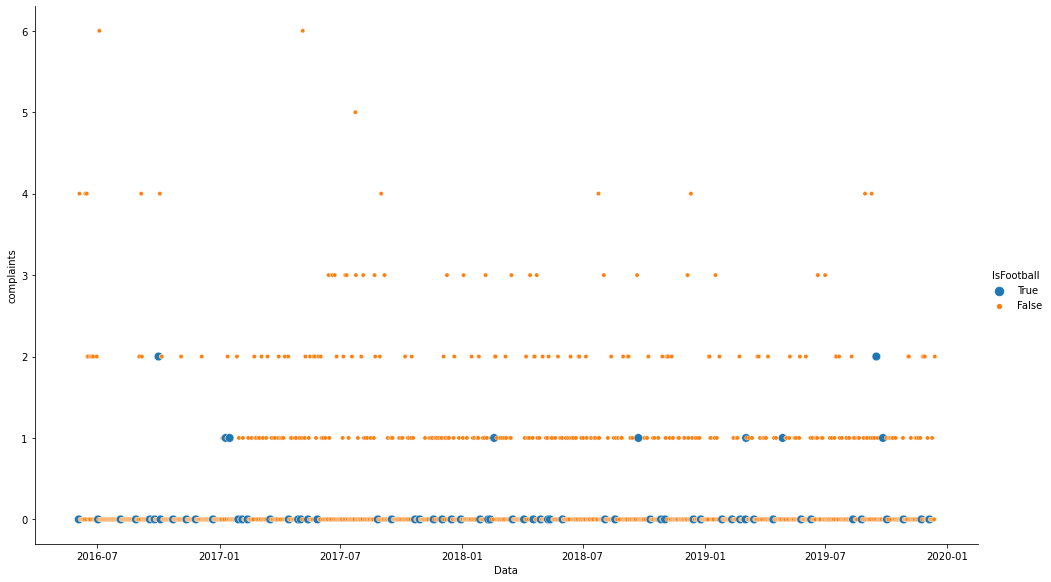

In [48]:
sns.relplot(x="Data", y="complaints", hue="IsFootball", hue_order=[True, False], size_order=[True, False], size="IsFootball", data=df_metrics_football_day, height=8, aspect=1.7);

## Combine weekends, holidays, football games into leisure score

In [49]:
def generate_row_leisure_score(row):
    count=0
    if row.IsHoliday:
        count+=1
        
    if row.IsFootball:
        count+=1
        
    if row.IsWeekend:
        count+=1
    
    return count

# Merge dfs
df_merged=pd.merge(df_metrics_holidays_day, df_metrics_football_day, left_on=["Data"], right_on=["Data"], how='outer')
df_merged=pd.merge(df_merged, df_weekend, left_on=["Data"], right_on=["Data"], how='outer')

df_merged=df_merged[df_merged["Data"].notnull()]
df_merged["leisure_score"]=df_merged.apply(lambda row: generate_row_leisure_score(row), axis=1)

df_leisure_day=df_merged[["Data", "complaints", "noise_peaks", "leisure_score"]]
df_leisure_day

,Data,complaints,noise_peaks,leisure_score
0,2016-06-01,0,3,0
1,2016-06-02,0,3,1
2,2016-06-03,0,4,1
3,2016-06-04,4,8,1
4,2016-06-05,0,5,1
...,...,...,...,...
1293,2019-12-09,1,1,0
1294,2019-12-10,0,0,0
1295,2019-12-11,0,1,0
1296,2019-12-12,0,2,0


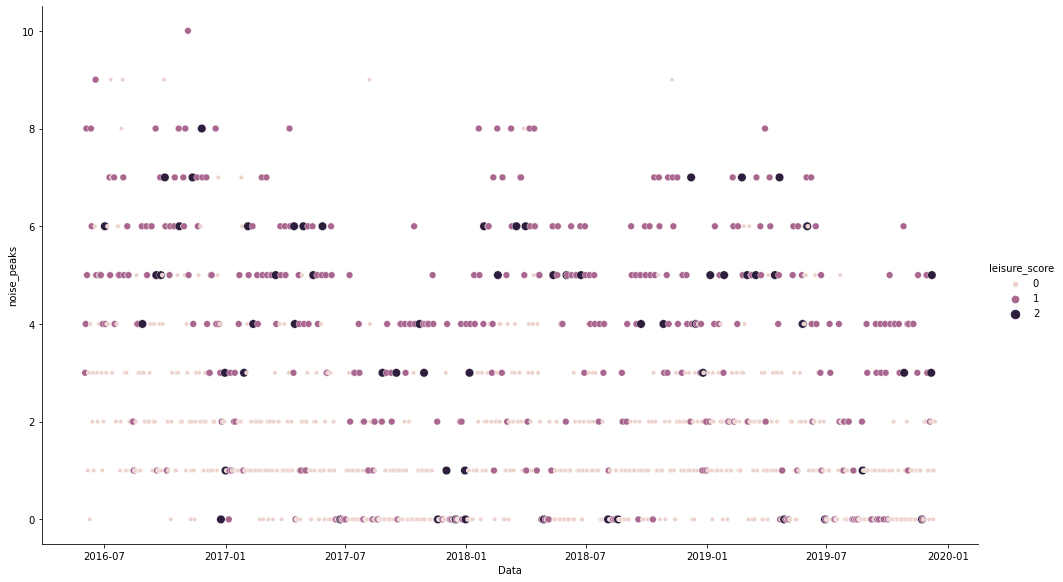

In [50]:
sns.relplot(x="Data", y="noise_peaks", hue="leisure_score", size="leisure_score", data=df_leisure_day, height=8, aspect=1.7);

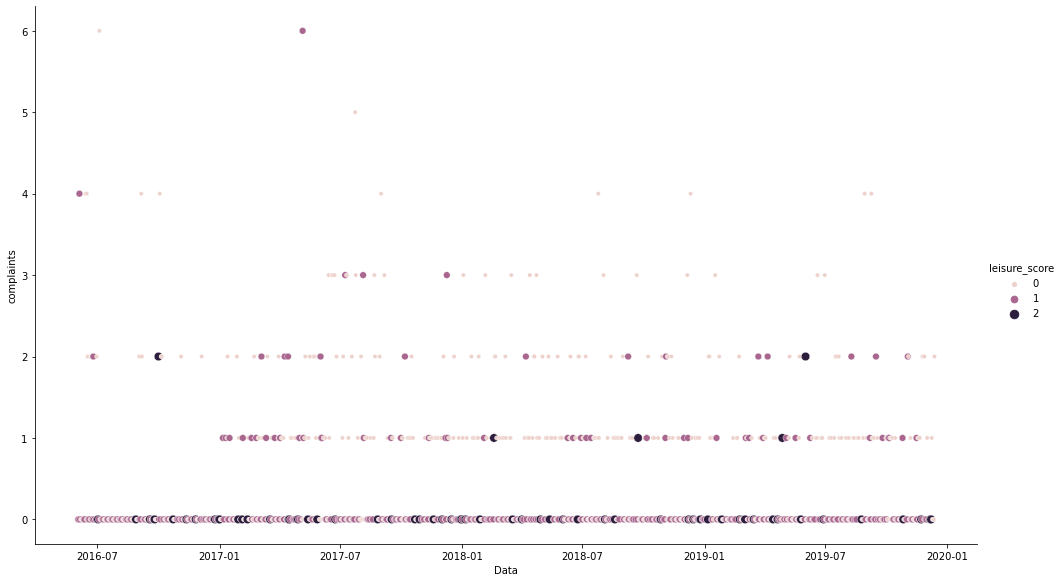

In [51]:
sns.relplot(x="Data", y="complaints", hue="leisure_score", size="leisure_score", data=df_leisure_day, height=8, aspect=1.7);

# CNN Prediction model

## First we generate our features

In [52]:
def generate_features(df, cols, distance=1, count_before=3, offset=0):
    # Filter rows in which we cannot trace back history
    periodDf = df[df.index-(count_before*distance+offset)>=0].copy()
    # Number of removed elements is the offset for the new df
    n_removed=df.shape[0]-periodDf.shape[0]
    # Add new features based on traced history
    for col in cols:
        for i in range(0, count_before):
            diff=(i+1)*distance+offset
            periodDf[col+"_minus_" + str(diff)]=periodDf.apply(lambda row: df.iloc[int(row.name)-diff][col], axis=1) 
        
    return periodDf

def prepare_inputs(X_train, X_test):
    ohe = OneHotEncoder()
    ohe.fit(X_train)
    X_train_enc = ohe.transform(X_train)
    X_test_enc = ohe.transform(X_test)
    return X_train_enc, X_test_enc


def split_df(df, train_size=0.8):
    train_size = math.floor(df.shape[0]*train_size)

    train = df[:train_size]
    test = df[train_size:]
    
    return train, test

def process_df(train, test):
    trainX = train[train.columns[4:]]
    trainX = trainX.to_numpy().reshape(trainX.shape[0], trainX.shape[1], 1)
    trainY = train[["noise_peaks"]]
    trainY = trainY.to_numpy().reshape(trainY.shape[0])
    testX = test[test.columns[4:]]
    testX = testX.to_numpy().reshape(testX.shape[0], testX.shape[1], 1)
    testY = test[["noise_peaks"]]
    testY = testY.to_numpy().reshape(testY.shape[0])
    
    
    return trainX, trainY, testX, testY

## Time series model parameters
* We are going to create 3 models:
    - 1) To predict up to one week (7 days) ahead of time
    - 2) To predict up to one month (30 days) ahead of time
    - 3) To predict up to one year (365 days) ahead of time

In [54]:
prediction_offset_params={
    7: [[1, 7], [1, 14], [1, 30], [7, 4], [7, 8], [7, 12]], #1 WEEK PREDICTION PARAMS
    30: [[1, 7], [1, 14], [1, 30], [7, 4], [7, 8], [7, 12]], #1 MONTH PREDICTION PARAMS
    365: [[1, 7], [1, 14], [1, 30], [7, 4], [7, 8], [7, 12]], #1 YEAR PREDICTION PARAMS
}

## Train model
- We generate a model for each of the defined parameters 
- We split our data into train and test (80% train 20% test)
- We choose the best model for each prediction time (7, 30, 365)

           Data  complaints  noise_peaks  leisure_score  noise_peaks_minus_8  \
14   2016-06-15           4            1              0                    3   
15   2016-06-16           2            5              0                    3   
16   2016-06-17           2            6              0                    0   
17   2016-06-18           0            9              1                    4   
18   2016-06-19           0            5              1                    8   
...         ...         ...          ...            ...                  ...   
1293 2019-12-09           1            1              0                    3   
1294 2019-12-10           0            0              0                    1   
1295 2019-12-11           0            1              0                    1   
1296 2019-12-12           0            2              0                    0   
1297 2019-12-13           2            2              0                    2   

      noise_peaks_minus_9  noise_peaks_

Train #1....
Train #2....
Train #3....
Train #4....
Train scores MSE scores (Prediction time (offset): 7, Distance: 1, Count: 14)>> [2.912853479385376, 6.37890625, 2.8509368896484375, 2.995082378387451, 6.37890625]
           Data  complaints  noise_peaks  leisure_score  noise_peaks_minus_8  \
37   2016-07-08           0            5              0                    2   
38   2016-07-09           0            7              1                    6   
39   2016-07-10           0            5              1                    6   
40   2016-07-11           0            9              0                    4   
41   2016-07-12           0            7              0                    3   
...         ...         ...          ...            ...                  ...   
1293 2019-12-09           1            1              0                    3   
1294 2019-12-10           0            0              0                    1   
1295 2019-12-11           0            1              0          

Train #1....
Train #2....
Train #3....
Train #4....
Train scores MSE scores (Prediction time (offset): 7, Distance: 7, Count: 4)>> [6.019762992858887, 2.6836695671081543, 3.0788137912750244, 2.747626781463623, 2.9363315105438232]
           Data  complaints  noise_peaks  leisure_score  noise_peaks_minus_14  \
63   2016-08-03           0            1              0                     4   
64   2016-08-04           0            3              0                     6   
65   2016-08-05           0            6              1                     6   
66   2016-08-06           0            5              1                     5   
67   2016-08-07           0            5              1                     5   
...         ...         ...          ...            ...                   ...   
1293 2019-12-09           1            1              0                     0   
1294 2019-12-10           0            0              0                     2   
1295 2019-12-11           0            1 

Train #1....
Train #2....
Train #3....
Train #4....
Train scores MSE scores (Prediction time (offset): 7, Distance: 7, Count: 12)>> [2.8593358993530273, 3.240255832672119, 3.6109299659729004, 3.1694867610931396, 2.7452313899993896]
Best Root mean Squared Error for Prediction time (offset) 7 >> 1.638190970410242 - Params (distance, count): [7, 4]


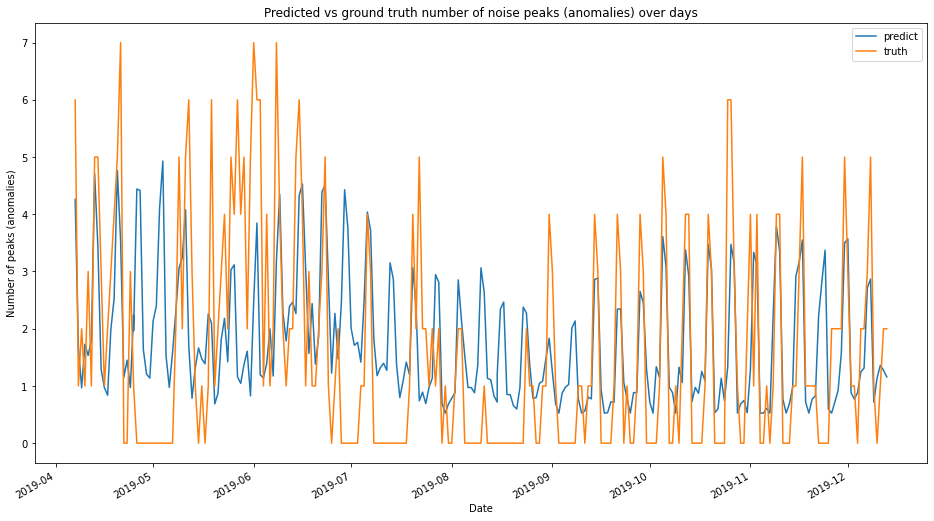

           Data  complaints  noise_peaks  leisure_score  noise_peaks_minus_31  \
37   2016-07-08           0            5              0                     3   
38   2016-07-09           0            7              1                     3   
39   2016-07-10           0            5              1                     0   
40   2016-07-11           0            9              0                     4   
41   2016-07-12           0            7              0                     8   
...         ...         ...          ...            ...                   ...   
1293 2019-12-09           1            1              0                     1   
1294 2019-12-10           0            0              0                     4   
1295 2019-12-11           0            1              0                     4   
1296 2019-12-12           0            2              0                     0   
1297 2019-12-13           2            2              0                     0   

      noise_peaks_minus_32 

Train #1....
Train #2....
Train #3....
Train #4....
Train scores MSE scores (Prediction time (offset): 30, Distance: 1, Count: 14)>> [3.195272207260132, 5.919886112213135, 3.3408660888671875, 5.920318603515625, 3.1739912033081055]
           Data  complaints  noise_peaks  leisure_score  noise_peaks_minus_31  \
60   2016-07-31           0            5              1                     2   
61   2016-08-01           0            3              0                     6   
62   2016-08-02           0            3              0                     6   
63   2016-08-03           0            1              0                     4   
64   2016-08-04           0            3              0                     3   
...         ...         ...          ...            ...                   ...   
1293 2019-12-09           1            1              0                     1   
1294 2019-12-10           0            0              0                     4   
1295 2019-12-11           0            1

Train #1....
Train #2....
Train #3....
Train #4....
Train scores MSE scores (Prediction time (offset): 30, Distance: 7, Count: 4)>> [3.637038230895996, 3.5896975994110107, 3.9870285987854004, 3.941347122192383, 3.7409865856170654]
           Data  complaints  noise_peaks  leisure_score  noise_peaks_minus_37  \
86   2016-08-25           0            1              0                     4   
87   2016-08-26           0            3              0                     6   
88   2016-08-27           0            6              1                     6   
89   2016-08-28           0            4              2                     5   
90   2016-08-29           0            3              0                     5   
...         ...         ...          ...            ...                   ...   
1293 2019-12-09           1            1              0                     1   
1294 2019-12-10           0            0              0                     4   
1295 2019-12-11           0            1

Train #1....
Train #2....
Train #3....
Train #4....
Train scores MSE scores (Prediction time (offset): 30, Distance: 7, Count: 12)>> [3.8576722145080566, 3.7508609294891357, 5.51898717880249, 3.451507329940796, 4.473844051361084]
Best Root mean Squared Error for Prediction time (offset) 30 >> 1.7774921549834026 - Params (distance, count): [1, 7]


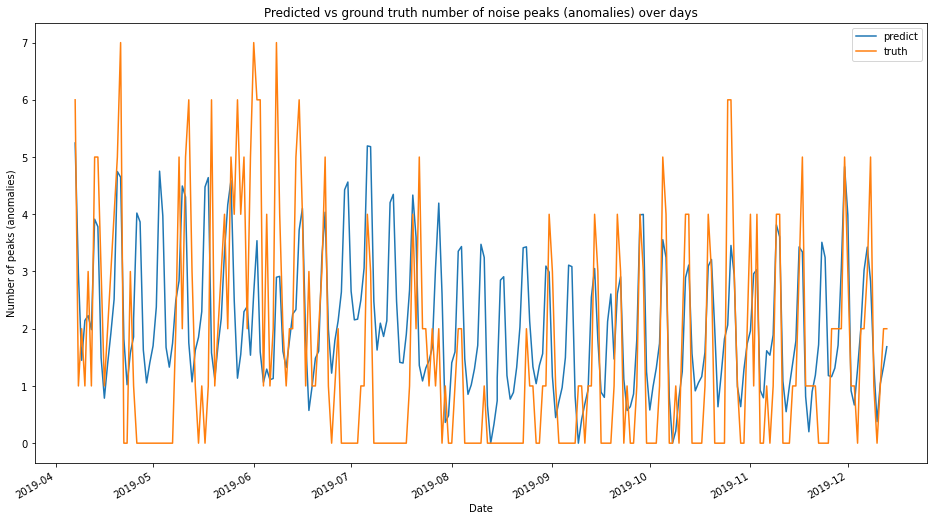

           Data  complaints  noise_peaks  leisure_score  \
372  2017-06-06           1            0              0   
373  2017-06-07           0            1              0   
374  2017-06-08           0            0              0   
375  2017-06-09           1            3              0   
376  2017-06-10           0            6              1   
...         ...         ...          ...            ...   
1293 2019-12-09           1            1              0   
1294 2019-12-10           0            0              0   
1295 2019-12-11           0            1              0   
1296 2019-12-12           0            2              0   
1297 2019-12-13           2            2              0   

      noise_peaks_minus_366  noise_peaks_minus_367  noise_peaks_minus_368  \
372                       3                      1                      5   
373                       3                      3                      1   
374                       0                      3          

Train #1....
Train #2....
Train #3....
Train #4....
Train scores MSE scores (Prediction time (offset): 365, Distance: 1, Count: 14)>> [2.989574670791626, 2.7391231060028076, 2.3386013507843018, 3.217343807220459, 3.635549545288086]
           Data  complaints  noise_peaks  leisure_score  \
395  2017-06-29           0            0              1   
396  2017-06-30           0            0              0   
397  2017-07-01           0            0              1   
398  2017-07-02           0            0              1   
399  2017-07-03           0            1              0   
...         ...         ...          ...            ...   
1293 2019-12-09           1            1              0   
1294 2019-12-10           0            0              0   
1295 2019-12-11           0            1              0   
1296 2019-12-12           0            2              0   
1297 2019-12-13           2            2              0   

      noise_peaks_minus_366  noise_peaks_minus_367  noise_p

Train #1....
Train #2....
Train #3....
Train #4....
Train scores MSE scores (Prediction time (offset): 365, Distance: 7, Count: 4)>> [3.319614887237549, 3.734806537628174, 3.2655117511749268, 3.2167294025421143, 3.7971038818359375]
           Data  complaints  noise_peaks  leisure_score  \
421  2017-07-25           3            0              0   
422  2017-07-26           0            2              0   
423  2017-07-27           0            0              0   
424  2017-07-28           1            1              0   
425  2017-07-29           0            0              1   
...         ...         ...          ...            ...   
1293 2019-12-09           1            1              0   
1294 2019-12-10           0            0              0   
1295 2019-12-11           0            1              0   
1296 2019-12-12           0            2              0   
1297 2019-12-13           2            2              0   

      noise_peaks_minus_372  noise_peaks_minus_379  noise_p

Train #1....
Train #2....
Train #3....
Train #4....
Train scores MSE scores (Prediction time (offset): 365, Distance: 7, Count: 12)>> [3.6722850799560547, 3.6547062397003174, 4.045616626739502, 4.4347453117370605, 3.5273818969726562]
Best Root mean Squared Error for Prediction time (offset) 365 >> 1.3394735631805448 - Params (distance, count): [1, 7]


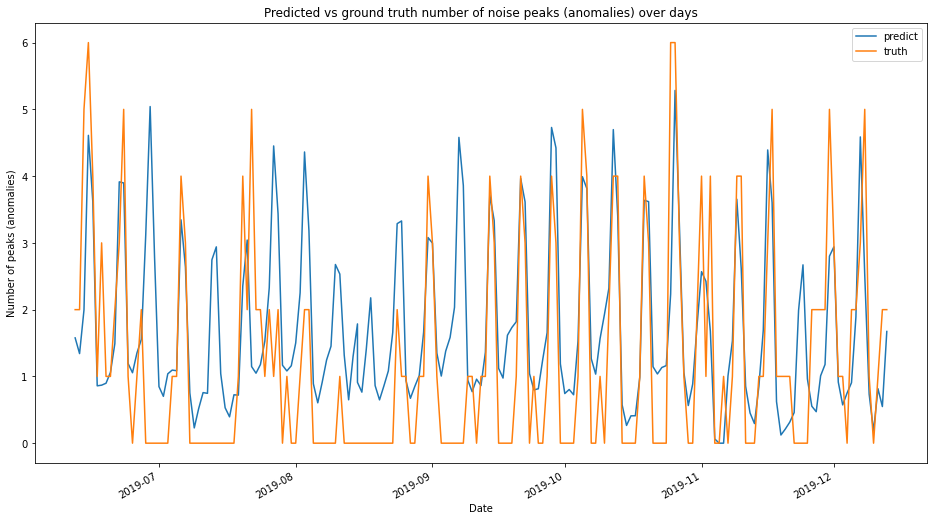

In [584]:
# fit and evaluate a model
def evaluate_model(trainX, trainy, testX, testy):
    verbose, epochs, batch_size = 0, 10, 32
    n_timesteps, n_features, n_outputs = trainX.shape[0], trainX.shape[1], trainX.shape[2]
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_features, n_outputs)))
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(1, activation='relu')) 
    model.compile(loss='mse', optimizer='adam', metrics=['mean_squared_error'])
    # fit network
    model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)
    # evaluate model
    _, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
    return model, accuracy


def run_experiment(trainX, trainy, testX, testy, repeats=10):
    min_score=-1
    min_model=None
    # repeat experiment
    scores = list()
    for r in range(repeats):
        print("Train #{}....".format(r))
        model, score = evaluate_model(trainX, trainy, testX, testy)
        if min_score==-1 or score<min_score:
            min_score=score
            min_model=model
        scores.append(score)
    return min_model, scores


for offset, confs in prediction_offset_params.items():
    best_params=None
    best_score=float('inf')
    best_model=None
    best_test_df=None
    for params in confs:
        distance=params[0]
        count=params[1]
        df_features=generate_features(
            df_leisure_day, 
            ["noise_peaks", "leisure_score"], 
            distance=distance, 
            count_before=count, 
            offset=offset
        )
        print(df_features)
        
        train, test = split_df(df_features)
        trainX, trainy, testX, testy = process_df(train, test)

        print("Train X shape: " + str(trainX.shape))
        print("Train Y shape: " + str(trainy.shape))

        print("Test X shape: " + str(testX.shape))
        print("Test Y shape: " + str(testy.shape))

        model, scores = run_experiment(trainX, trainy, testX, testy, repeats=5)
        
        print ("Train scores MSE scores (Prediction time (offset): {}, Distance: {}, Count: {})>> {}".format(offset, distance, count, str(scores)))
        
        predict = model.predict(testX)
        dfPredict=pd.DataFrame(data=predict.flatten()[:], columns=["predict"])
        truth=pd.DataFrame(data=testy[:], columns=["truth"])
        testDf=pd.concat([dfPredict, truth, test.reset_index()[["Data"]]], axis=1)
        rms = np.sqrt(mean_squared_error(testDf["truth"], testDf["predict"]))
        
        if rms<best_score:
            best_score=rms
            best_params=params
            best_model=model
            best_test_df=testDf
    
    print ("Best Root mean Squared Error for Prediction time (offset) {} >> {} - Params (distance, count): {}".format(offset, str(best_score), str(best_params)))
    best_test_df.reset_index()
    ax=best_test_df.plot(x="Data", figsize=(16,9), title='Predicted vs ground truth number of noise peaks (anomalies) over days')

    ax.set_xlabel("Date")
    ax.set_ylabel("Number of peaks (anomalies)")
    plt.show()

## Evaluate model on test set

In [551]:
predict = model.predict(testX)
dfPredict=pd.DataFrame(data=predict.flatten()[:], columns=["predict"])
truth=pd.DataFrame(data=testy[:], columns=["truth"])
testDf=pd.concat([dfPredict, truth, test.reset_index()[["Data"]]], axis=1)
testDf

,predict,truth,Data
0,1.392873,0,2019-04-03
1,1.150777,5,2019-04-04
2,1.738560,6,2019-04-05
3,3.187592,7,2019-04-06
4,6.210469,6,2019-04-07
...,...,...,...
252,1.711459,1,2019-12-09
253,1.057675,0,2019-12-10
254,1.288003,1,2019-12-11
255,1.608950,2,2019-12-12


Root mean Squared Error >> 1.798686649306827


Text(0, 0.5, 'Number of peaks (anomalies)')

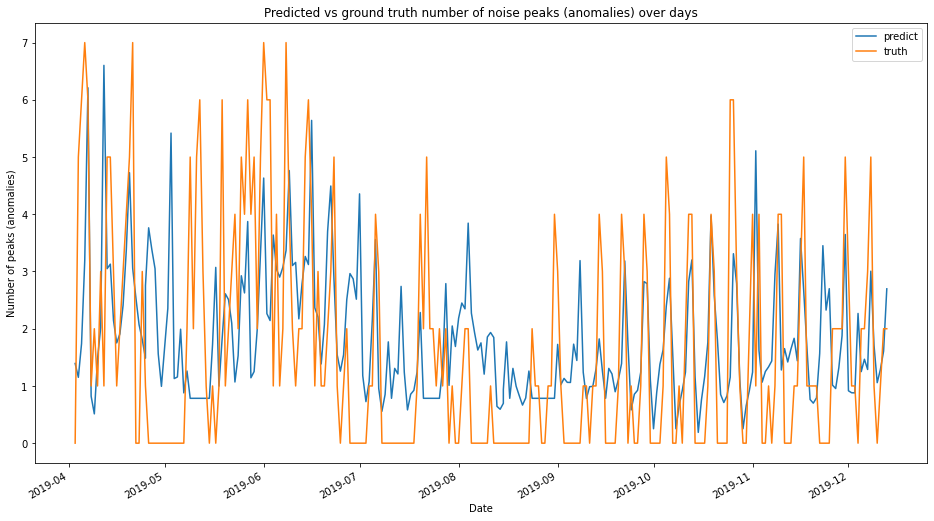

In [552]:
rms = np.sqrt(mean_squared_error(testDf["truth"], testDf["predict"]))
print ("Root mean Squared Error >> " + str(rms))
testDf.reset_index()
ax=testDf.plot(x="Data", figsize=(16,9), title='Predicted vs ground truth number of noise peaks (anomalies) over days')

ax.set_xlabel("Date")
ax.set_ylabel("Number of peaks (anomalies)")